In [1]:
from utils.metrics import Metrics
from strategy.auto_baseline import AutoBaseline
from strategy.auto_idx_rebalance import AutoIndexRebalance
from strategy.hold_cash import HoldCash

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, YearLocator
import random

/Users/aaronlalala/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/aaronlalala/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
symbol = "IWY"
strategy = AutoBaseline(0, "2012-04-25", "2024-05-01")
hold_cash = HoldCash(0, "2012-04-25", "2024-05-01")
hold_cash.read_history_data(f"data/{symbol}/{symbol}.csv", symbol)
strategy.read_history_data(f"data/{symbol}/{symbol}.csv", symbol)

In [3]:
strategy2 = AutoIndexRebalance(0, "2012-04-25", "2024-05-01", 252)
symbol = "MOAT"
strategy2.read_history_data(f"data/{symbol}/{symbol}.csv", symbol)
symbol = "IWY"
strategy2.read_history_data(f"data/{symbol}/{symbol}.csv", symbol)

In [4]:
strategy_results = strategy.run()
strategy2_results = strategy2.run()
hold_cash_results = hold_cash.run()

In [5]:
def process_results(results):
    df = pd.DataFrame(list(results.items()), columns=['Date', 'Value'])
    df['Date'] = pd.to_datetime(df['Date']) 
    return df

In [6]:
strategy_results = process_results(strategy_results)
strategy2_results = process_results(strategy2_results)
hold_cash_results = process_results(hold_cash_results)

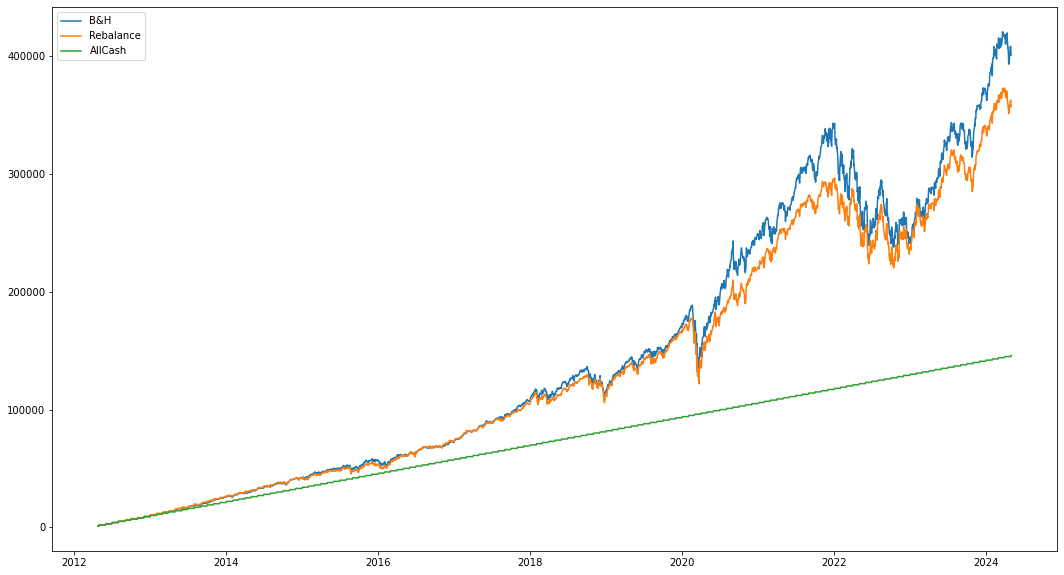

In [7]:
plt.figure(figsize=(18, 10))
plt.plot(strategy_results["Date"].values, strategy_results['Value'].values, label="B&H")
plt.plot(strategy2_results["Date"].values, strategy2_results['Value'].values, label="Rebalance")
plt.plot(hold_cash_results["Date"].values, hold_cash_results['Value'].values, label="AllCash")
plt.legend()

In [8]:
from utils.metrics import Metrics

In [9]:
Metrics.sharpe(strategy_results["Value"])

0.0863

In [10]:
Metrics.sharpe(strategy2_results["Value"])

0.0857